In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [2]:
file = open(r'C:\Users\Akshat Singh\Desktop\Projects\Whatsapp Group Chat Analysis\WhatsApp Chat with Cringe Factory.txt', encoding='utf-8')
#file

In [3]:
chat = file.read()
file.close()
#chat

## Data Preprocessing

In [4]:
msgs = re.findall('(\d+/\d+/\d+, \d+:\d+\d+ [A-Z]{2}) - (.*?): (.*)', chat) 
#'\' => don't treat as special char d' => digit (of the dates), '+' => one or more char of the same type, 
#'[A-Z]{2}' => 2 alphabets (AM, PM), '.' => any char, '*' => specified char zero or more times, '?' => make it lazy & not greedy
#msgs

In [5]:
type(msgs)

list

In [6]:
type(msgs[0])

tuple

In [7]:
msgs = pd.DataFrame(msgs, columns=['Date', 'Name', 'Message'])
msgs.head()

,Date,Name,Message
0,"11/17/20, 4:47 PM",Akshat RK Singh,<Media omitted>
1,"11/17/20, 4:50 PM",Akshat RK Singh,Add😂
2,"11/17/20, 5:12 PM",Akshat RK Singh,<Media omitted>
3,"11/17/20, 5:12 PM",Sakshi Rawat,<Media omitted>
4,"11/17/20, 5:13 PM",Akshat RK Singh,<Media omitted>


In [8]:
msgs.replace(to_replace='<Media omitted>',value='Non-Textual Media', inplace = True)
msgs

,Date,Name,Message
0,"11/17/20, 4:47 PM",Akshat RK Singh,Non-Textual Media
1,"11/17/20, 4:50 PM",Akshat RK Singh,Add😂
2,"11/17/20, 5:12 PM",Akshat RK Singh,Non-Textual Media
3,"11/17/20, 5:12 PM",Sakshi Rawat,Non-Textual Media
4,"11/17/20, 5:13 PM",Akshat RK Singh,Non-Textual Media
...,...,...,...
10070,"6/13/21, 12:46 PM",Akshat RK Singh,Non-Textual Media
10071,"6/13/21, 2:15 PM",Shradha,Non-Textual Media
10072,"6/13/21, 7:23 PM",Shradha,Non-Textual Media
10073,"6/13/21, 7:42 PM",Sakshi Rawat,🤭🤭🤭🤭lol


## Exploratory Data Analysis

In [9]:
msgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     10075 non-null  object
 1   Name     10075 non-null  object
 2   Message  10075 non-null  object
dtypes: object(3)
memory usage: 236.3+ KB


In [10]:
msgs['Name'].iat[9999] + " : " + msgs['Message'].iat[9999]  # 10000th message

'Akshat RK Singh : Gayaaaa'

In [11]:
msgs['Name'].value_counts()    # Each participant and their total messages

Sakshi Rawat       3929
Akshat RK Singh    3152
Shradha            2994
Name: Name, dtype: int64

In [12]:
from wordcloud import WordCloud
def plot_wordcloud(text):
    wordcloud = WordCloud(max_words=100, background_color='white', repeat='false', min_word_length=4).generate(",".join(text))
    plt.imshow(wordcloud, interpolation='bilinear')    # interpolation='bilinear' is to make the image smoother
    plt.axis("off")
    plt.show()
    wordcloud.to_file('./wordcloud.jpg')

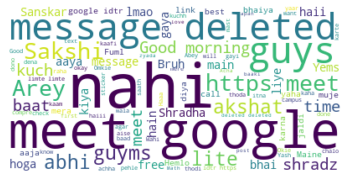

In [13]:
msgs_temp = msgs.replace(to_replace='Non-Textual Media',value='')
plot_wordcloud(msgs_temp['Message'])

In [14]:
len(msgs[msgs['Message'] == 'Non-Textual Media'])  # Total non-textual messages

3431